In [1]:
# %load imports.ipy
# Stdlib
from functools import partial
from itertools import chain
from pprint import pprint as print

import numpy as np
import pandas as pd

pd.set_option('display.max_columns',102)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width',120)
import sklearn
print(f'numpy {np.__version__} pandas {pd.__version__} sklearn {sklearn.__version__}')

# Visualization

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot

custom_style = {'axes.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white', }
sns.set_style( rc=custom_style)
mpl.rcParams['figure.figsize']=(10,10)
plt.rcParams['figure.figsize']=(10,10)
jtplot.style('monokai')
# Custom stuff
from swozny_ml import *
from genetic.parameter_optimization import tune_params_genetic
from math import ceil

'numpy 1.13.3 pandas 0.20.3 sklearn 0.19.0'


/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# Config

In [2]:
filename = 'datasets/kobe.csv'
index = 'shot_id'
target = 'shot_made_flag'
data = pd.read_csv(filename, index_col=index)

In [3]:
# Read data
def quantize(data,col,bins):
    _data=data[col].astype('category')
    col_map=pd.qcut(data.groupby(col).mean()[target].sort_values(),bins)
    return _data.map(col_map).cat.codes

In [4]:
from sklearn import mixture
numGaussians = 13
gaussianMixtureModel = mixture.GMM(n_components=numGaussians, covariance_type='full', 
                                   params='wmc', init_params='wmc',
                                   random_state=1, n_init=3,  verbose=0)
gaussianMixtureModel.fit(data.ix[:,['loc_x','loc_y']])
data['shot_location_cluster'] = gaussianMixtureModel.predict(data.ix[:,['loc_x','loc_y']])
# data['minutes_remaining']=pd.np.digitize(data.minutes_remaining,bins=[-1,1,5,11,15]).astype('int')
data['seconds_remaining']=pd.np.digitize(data.seconds_remaining,bins=[3,65]).astype('int')
data['shot_distance']=pd.Series([x if x<45 else 45 for x in data['shot_distance']])
# data['period']=quantize(data,'period',4)
data['weekday']=pd.to_datetime(data['game_date']).dt.weekday
data['month']=pd.to_datetime(data['game_date']).dt.month
data['year']=pd.to_datetime(data['game_date']).dt.year
data['home']=data['matchup'].str.contains('vs').astype('int')
data=data.drop(['loc_x','loc_y','lat','lon','team_id','game_id','team_name','matchup','game_date','game_event_id','month','weekday','year'],axis=1)
print(data.head())

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The function distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75

/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/home/swozny/untitled5/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75

               action_type combined_shot_type  minutes_remaining  period  playoffs   season  seconds_remaining  \
shot_id                                                                                                          
1        Jump Shot          Jump Shot          10                 1       0         2000-01  1                   
2        Jump Shot          Jump Shot          10                 1       0         2000-01  1                   
3        Jump Shot          Jump Shot          7                  1       0         2000-01  1                   
4        Jump Shot          Jump Shot          6                  1       0         2000-01  1                   
5        Driving Dunk Shot  Dunk               6                  2       0         2000-01  1                   

         shot_distance  shot_made_flag       shot_type         shot_zone_area  shot_zone_basic  shot_zone_range  \
shot_id                                                                               

## Categorical

In [5]:
# Categorical
categorical = data.select_dtypes(exclude=[np.number])
for col in categorical:
    data[col]=data[col].astype('category')
categorical = data.select_dtypes(exclude=[np.number])
data['season']=quantize(data,'season',4)
# data['shot_zone_area']=quantize(data,'shot_zone_area',3)
# data['opponent']=quantize(data,'opponent',4)

data['action_type']=data['action_type'].replace(['Cutting Finger Roll Layup Shot', 'Turnaround Fadeaway Bank Jump Shot'],['Finger Roll Layup Shot','Fadeaway Bank shot'])
data['action_type']=quantize(data,'action_type',8)
categorical = data.select_dtypes(exclude=[np.number])
categorical.describe()

,combined_shot_type,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,opponent
count,30697,30697,30697,30697,30697,30697
unique,6,2,6,7,5,33
top,Jump Shot,2PT Field Goal,Center(C),Mid-Range,Less Than 8 ft.,SAS
freq,23485,24271,13455,12625,9398,1978


## Numerical

In [6]:
numerical = data.select_dtypes(include=[np.number])
numerical.describe()

,action_type,minutes_remaining,period,playoffs,season,seconds_remaining,shot_distance,shot_made_flag,shot_location_cluster,home
count,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30697.000000,30696.000000,25697.000000,30697.000000,30697.000000
mean,1.070691,4.885624,2.519432,0.146562,1.762778,0.926964,13.408490,0.446161,6.013519,0.487214
std,1.852495,3.449897,1.153665,0.353674,1.006600,0.260201,9.248359,0.497103,3.692558,0.499845
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,5.000000,0.000000,3.000000,0.000000
50%,0.000000,5.000000,3.000000,0.000000,2.000000,1.000000,15.000000,0.000000,5.000000,0.000000
75%,2.000000,8.000000,3.000000,0.000000,3.000000,1.000000,21.000000,1.000000,10.000000,1.000000
max,7.000000,11.000000,7.000000,1.000000,3.000000,1.000000,45.000000,1.000000,12.000000,1.000000


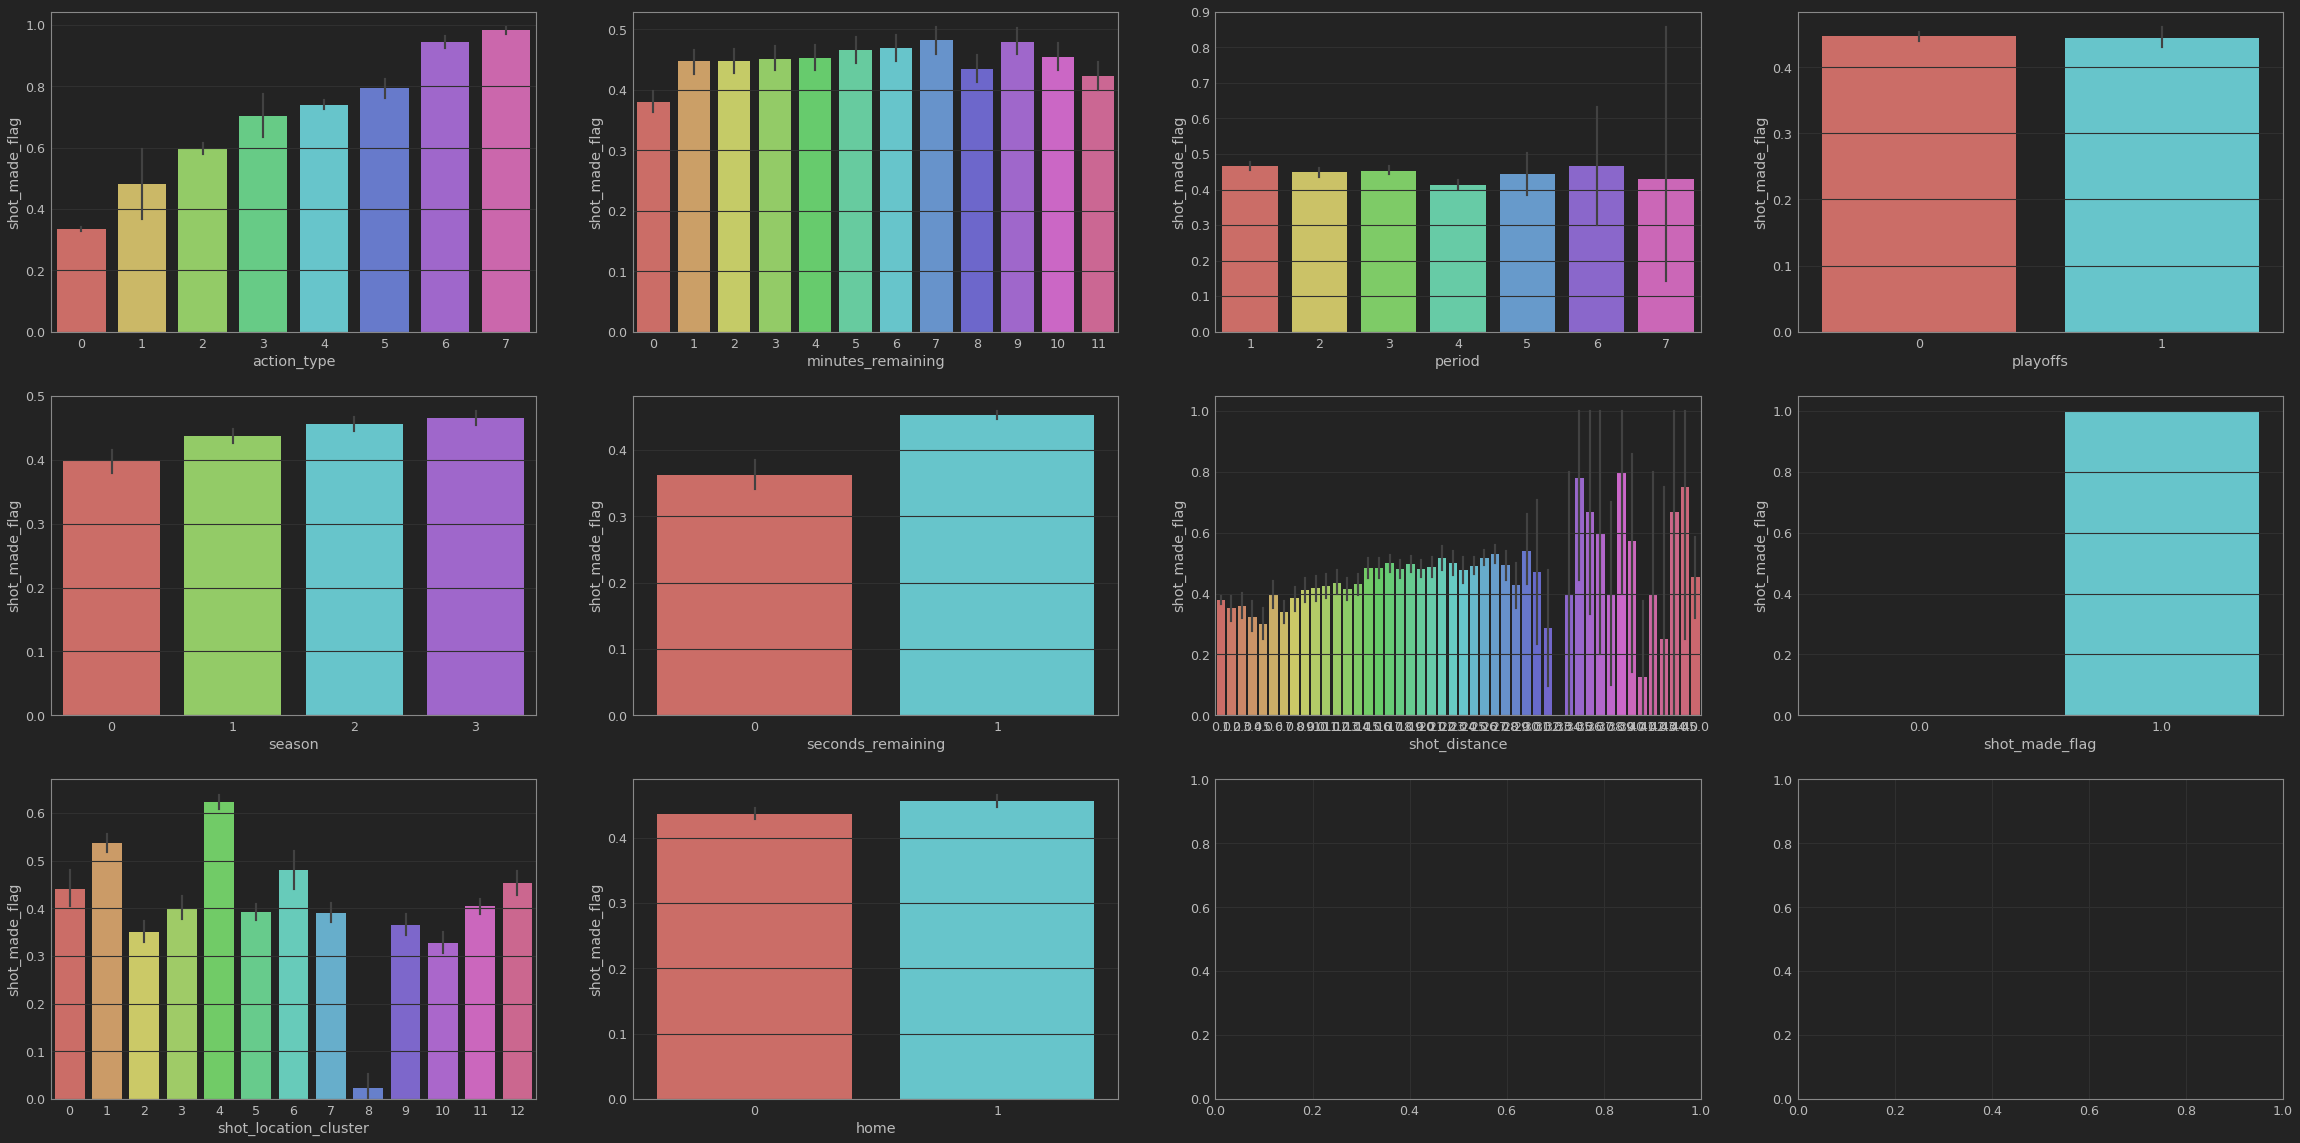

In [7]:
fig, ax = plt.subplots(ncols=4,nrows=ceil(len(numerical.columns)/4),figsize=(40,20))
for col,ax in zip(numerical.columns,chain(*ax)):
    if len(data[col].unique())<60:
        sns.factorplot(data=data,x=col,y='shot_made_flag',ax=ax,kind='bar',palette='hls')
        plt.close(2)
    else:
        g=sns.distplot(data[data[target]==0][col],ax=ax,color='grey')
        sns.distplot(data[data[target]==1][col],color='green',ax=ax)

In [8]:
_data=data.drop(['shot_made_flag'],axis=1)
for col in _data:
    _data[col]=_data[col].astype('category')
_data=pd.get_dummies(_data,drop_first=True)
_data['shot_made_flag']=data.shot_made_flag
data=_data

In [9]:
data.to_csv('datasets/preprocessed_kobe.csv')
data

,action_type_1,action_type_2,action_type_3,action_type_4,action_type_5,action_type_6,action_type_7,combined_shot_type_Dunk,combined_shot_type_Hook Shot,combined_shot_type_Jump Shot,combined_shot_type_Layup,combined_shot_type_Tip Shot,minutes_remaining_1,minutes_remaining_2,minutes_remaining_3,minutes_remaining_4,minutes_remaining_5,minutes_remaining_6,minutes_remaining_7,minutes_remaining_8,minutes_remaining_9,minutes_remaining_10,minutes_remaining_11,period_2,period_3,period_4,period_5,period_6,period_7,playoffs_1,season_1,season_2,season_3,seconds_remaining_1,shot_distance_1.0,shot_distance_2.0,shot_distance_3.0,shot_distance_4.0,shot_distance_5.0,shot_distance_6.0,shot_distance_7.0,shot_distance_8.0,shot_distance_9.0,shot_distance_10.0,shot_distance_11.0,shot_distance_12.0,shot_distance_13.0,shot_distance_14.0,shot_distance_15.0,shot_distance_16.0,shot_distance_17.0,...,shot_zone_basic_Right Corner 3,shot_zone_range_24+ ft.,shot_zone_range_8-16 ft.,shot_zone_range_Back Court Shot,shot_zone_range_Less Than 8 ft.,opponent_BKN,opponent_BOS,opponent_CHA,opponent_CHI,opponent_CLE,opponent_DAL,opponent_DEN,opponent_DET,opponent_GSW,opponent_HOU,opponent_IND,opponent_LAC,opponent_MEM,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NJN,opponent_NOH,opponent_NOP,opponent_NYK,opponent_OKC,opponent_ORL,opponent_PHI,opponent_PHX,opponent_POR,opponent_SAC,opponent_SAS,opponent_SEA,opponent_TOR,opponent_UTA,opponent_VAN,opponent_WAS,shot_location_cluster_1,shot_location_cluster_2,shot_location_cluster_3,shot_location_cluster_4,shot_location_cluster_5,shot_location_cluster_6,shot_location_cluster_7,shot_location_cluster_8,shot_location_cluster_9,shot_location_cluster_10,shot_location_cluster_11,shot_location_cluster_12,home_1,shot_made_flag
shot_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NaN
2,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1.0
4,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0.0
5,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.0
7,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1.0
8,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,NaN
9,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.0


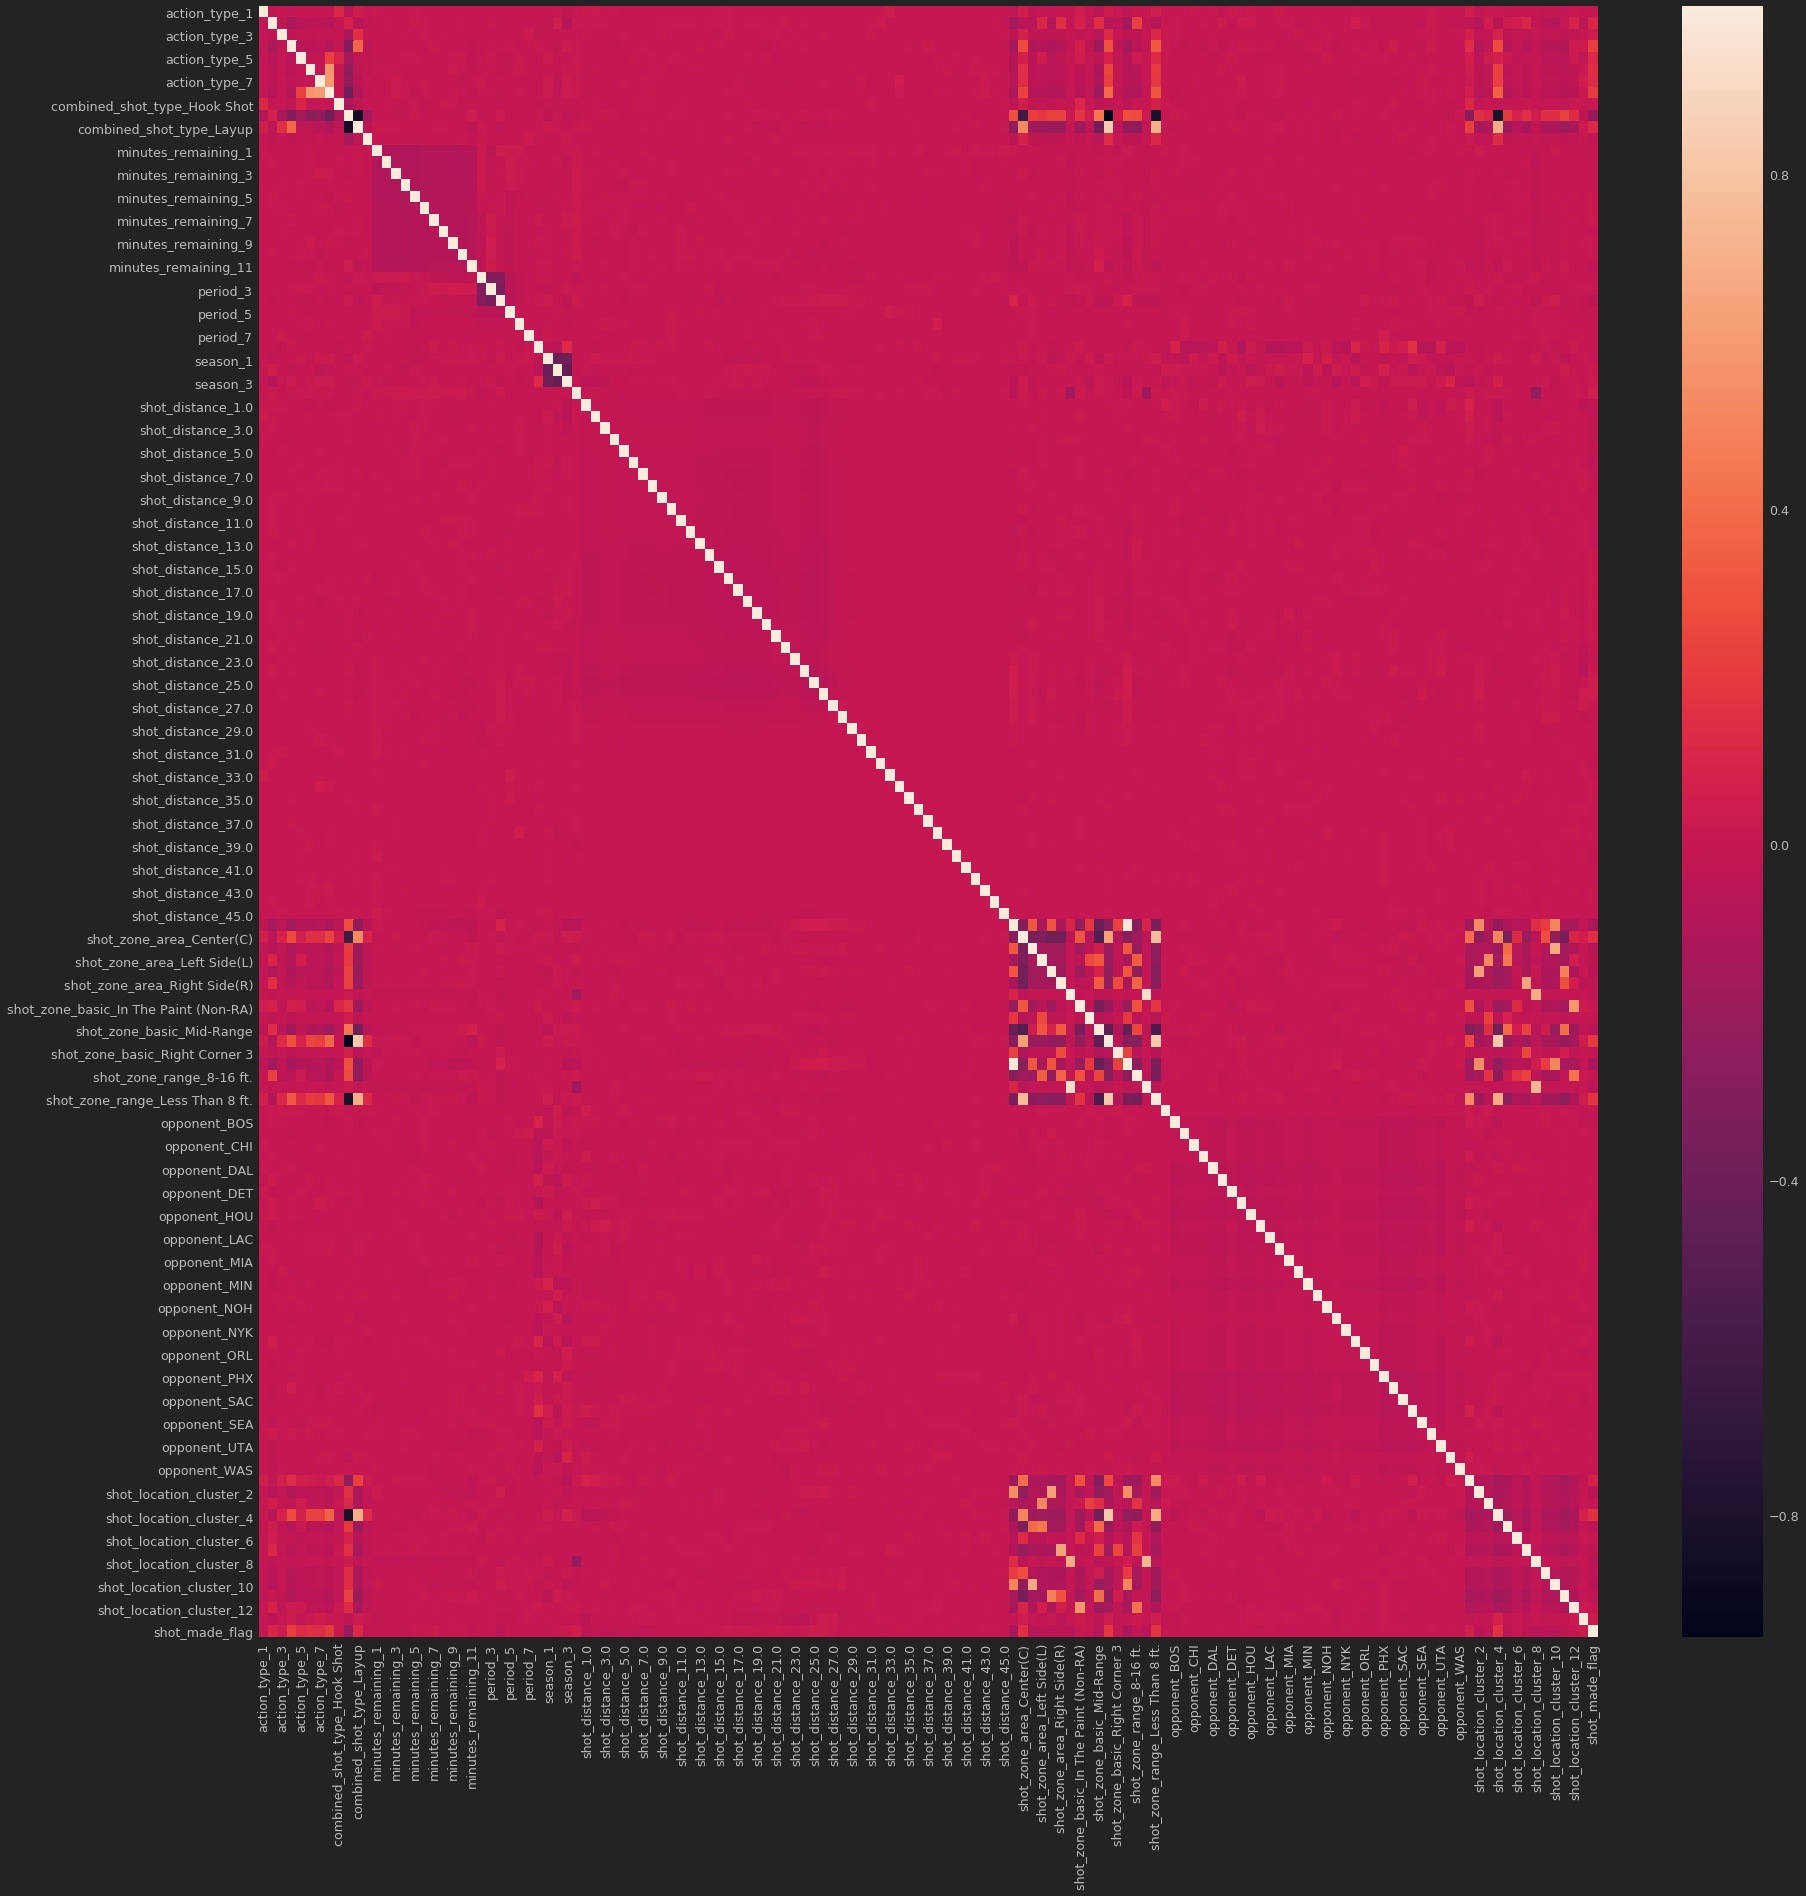

In [10]:
plt.figure(figsize=(30,30))
sns.heatmap(data.corr())